In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# @FileName     :Eco Statistical analysis.ipynb
# @Time         :2024/01/30 11:10:35
# @Author       :YangChunhe
# @Email        :2393492851@qq.com
# @Description  :file content

import os 
import pandas as pd
import numpy as np 
import warnings          
warnings.filterwarnings('ignore')
import re  
from os.path import exists
from utils import algin_tool,draw_tool
from utils import hr_analysis_tool as hr_tool
from utils import sequencing_primer_analysis_tool as sequencing_primer_tool

# 大肠基因组的所有基因

In [2]:
all_df = pd.read_excel("/home/yanghe/program/Supplementary file-1.xlsx")
all_df = all_df[['locus_tag', 'feature', 'class', 'start', 'end', 'strand',
       'product_accession', 'non-redundant_refseq', 'name', 'symbol', 'GeneID']]
pseudogene=[
{
    'locus_tag':"b0229",
    'feature':"gene",
    'class':"pseudogene",
    'start':248358,
    'end':250070,
    'strand':"-",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"lfhA",
    'GeneID':944908    
},

{
    'locus_tag':"b0263",
    'feature':"gene",
    'class':"pseudogene",
    'start':278814,
    'end':279162,
    'strand':"-",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"afuB",
    'GeneID':947073  
},

{
    'locus_tag':"b0705",
    'feature':"gene",
    'class':"pseudogene",
    'start':736900,
    'end':737961,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"ybfL",
    'GeneID':947075  
},

{
    'locus_tag':"b4505",
    'feature':"gene",
    'class':"pseudogene",
    'start':280114,
    'end':280362,
    'strand':"-",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"insX",
    'GeneID':1450237  
},

{
    'locus_tag':"b4708",
    'feature':"gene",
    'class':"pseudogene",
    'start':279931,
    'end':280104,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"insI2",
    'GeneID':14678508
},

{
    'locus_tag':"b0218",
    'feature':"gene",
    'class':"pseudogene",
    'start':238746,
    'end':239084,
    'strand':"-",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"yafU",
    'GeneID':946644
},
{
    'locus_tag':"b0235",
    'feature':"gene",
    'class':"pseudogene",
    'start':253467,
    'end':253733,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"ykfJ",
    'GeneID':944924    
},
{
    'locus_tag':"b0499",
    'feature':"gene",
    'class':"pseudogene",
    'start':527949,
    'end':528659,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"ylbH",
    'GeneID':945114    
},
{
    'locus_tag':"b3135",
    'feature':"gene",
    'class':"pseudogene",
    'start':3281122,
    'end':3281625,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"agaA",
    'GeneID':947646    
},
{
    'locus_tag':"b4561",
    'feature':"gene",
    'class':"pseudogene",
    'start':4508684,
    'end':4508942,
    'strand':"-",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"insM",
    'GeneID':1450310    
},
{
    'locus_tag':"b4627",
    'feature':"gene",
    'class':"pseudogene",
    'start':266553,
    'end':266774,
    'strand':"-",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"ykfL",
    'GeneID':5625553    
},
{
    'locus_tag':"b4628",
    'feature':"gene",
    'class':"pseudogene",
    'start':266776,
    'end':266967,
    'strand':"-",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"ykfK",
    'GeneID':5625554    
},
{
    'locus_tag':"b4634",
    'feature':"gene",
    'class':"pseudogene",
    'start':581354,
    'end':581662,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"aaaD",
    'GeneID':5625560    
},
{
    'locus_tag':"b4652",
    'feature':"gene",
    'class':"pseudogene",
    'start':3769948,
    'end':3770146,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"yibU",
    'GeneID':5625578    
},
{
    'locus_tag':"b4653",
    'feature':"gene",
    'class':"pseudogene",
    'start':3836425,
    'end':3836556,
    'strand':"+",
    'product_accession':"",
    'non-redundant_refseq':"",
    'name':"",
    'symbol':"yicT",
    'GeneID':5625579    
}
]
all_df = all_df.append( pd.DataFrame(pseudogene))

In [3]:
all_df.head()

,locus_tag,feature,class,start,end,strand,product_accession,non-redundant_refseq,name,symbol,GeneID
0,b0001,CDS,with_protein,190,255,+,NP_414542.1,WP_001386572.1,thr operon leader peptide,thrL,944742
1,b0002,CDS,with_protein,337,2799,+,NP_414543.1,WP_001264707.1,fused aspartate kinase/homoserine dehydrogenase 1,thrA,945803
2,b0003,CDS,with_protein,2801,3733,+,NP_414544.1,WP_000241662.1,homoserine kinase,thrB,947498
3,b0004,CDS,with_protein,3734,5020,+,NP_414545.1,WP_000781074.1,threonine synthase,thrC,945198
4,b0005,CDS,with_protein,5234,5530,+,NP_414546.1,WP_000738719.1,DUF2502 domain-containing protein YaaX,yaaX,944747


# 关于同源臂脱靶预测的数量统计
    

#### 同源臂长度---145

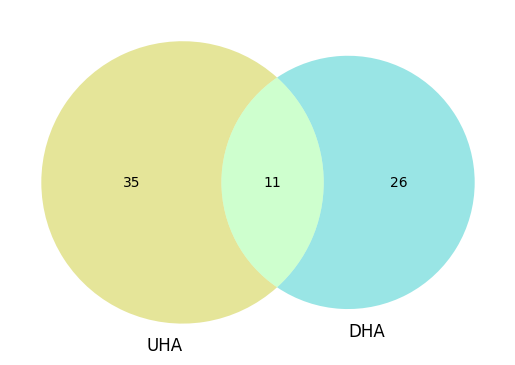

只上游同源臂脱靶：35--------只下游同源臂脱靶：26---------上、下同时脱靶：11------>总脱靶：72 


In [4]:
evaluate_result_path = './data/145_Evaluation_result.xlsx'
hr_off_target_type="Off-target 145"  

evaluate_result = pd.read_excel(evaluate_result_path)
evaluate_result = evaluate_result.groupby('query or source (gene) sequence id').apply(lambda x:  x if len(x[ (x['off target']=='high') | (x['off target']=='medium') ] ) > 0  else pd.DataFrame())
evaluate_result = evaluate_result.reset_index(drop=True)

evaluate_result = pd.read_excel(evaluate_result_path)  
result = evaluate_result.copy()  
a = hr_tool.get_offtarget_genome_cor(evaluate_result)

u_d_hr_offTarget_id, u_hr_offTarget_id, d_hr_offTarget_id = hr_tool.get_uha_dha_hr_offtarget(evaluate_result) 

hr_df_145 = hr_tool.get_offtarget(a , hr_off_target_type,  u_d_hr_offTarget_id, u_hr_offTarget_id,  d_hr_offTarget_id ) 

hr_df_145 = hr_tool.add_uha_dha_coord(hr_df_145,evaluate_result,145)

draw_tool.draw_venn( evaluate_result_path )

#### 同源臂长度---500

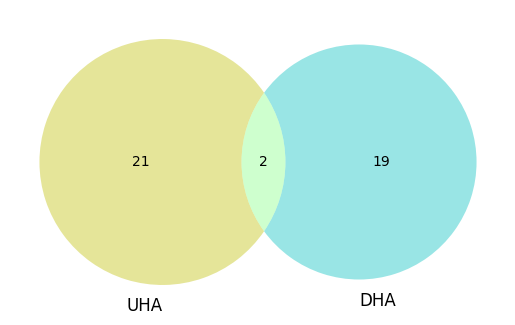

只上游同源臂脱靶：21--------只下游同源臂脱靶：19---------上、下同时脱靶：2------>总脱靶：42 


In [5]:
evaluate_result_path = './data/500_Evaluation_result.xlsx'
hr_off_target_type="Off-target 500"
evaluate_result = pd.read_excel(evaluate_result_path)
evaluate_result = evaluate_result.groupby('query or source (gene) sequence id').apply(lambda x:  x if len(x[ (x['off target']=='high') | (x['off target']=='medium') ] ) > 0  else pd.DataFrame())
evaluate_result = evaluate_result.reset_index(drop=True)

a = hr_tool.get_offtarget_genome_cor(evaluate_result)

u_d_hr_offTarget_id, u_hr_offTarget_id, d_hr_offTarget_id = hr_tool.get_uha_dha_hr_offtarget(evaluate_result)
hr_df_500 = hr_tool.get_offtarget(a , hr_off_target_type,  u_d_hr_offTarget_id, u_hr_offTarget_id,  d_hr_offTarget_id )  
hr_df_500 = hr_tool.add_uha_dha_coord(hr_df_500,evaluate_result,500)

draw_tool.draw_venn( evaluate_result_path )

#### 同源臂长度---1000

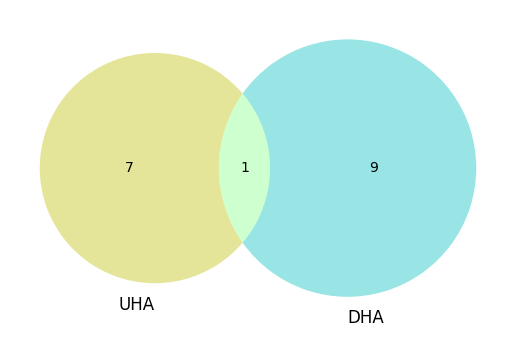

只上游同源臂脱靶：7--------只下游同源臂脱靶：9---------上、下同时脱靶：1------>总脱靶：17 


In [6]:
evaluate_result_path = './data/1000_Evaluation_result.xlsx'
hr_off_target_type="Off-target 1000"
evaluate_result = pd.read_excel(evaluate_result_path)
evaluate_result = evaluate_result.groupby('query or source (gene) sequence id').apply(lambda x:  x if len(x[ (x['off target']=='high') | (x['off target']=='medium') ] ) > 0  else pd.DataFrame())
evaluate_result = evaluate_result.reset_index(drop=True)

a = hr_tool.get_offtarget_genome_cor(evaluate_result)

u_d_hr_offTarget_id, u_hr_offTarget_id, d_hr_offTarget_id = hr_tool.get_uha_dha_hr_offtarget(evaluate_result)  

hr_df_1000 = hr_tool.get_offtarget(a , hr_off_target_type,  u_d_hr_offTarget_id, u_hr_offTarget_id,  d_hr_offTarget_id )
hr_df_1000 = hr_tool.add_uha_dha_coord(hr_df_1000,evaluate_result,1000)

draw_tool.draw_venn( evaluate_result_path )

## 统计同源臂在145--500-1000脱靶数量

In [7]:
hr_df_145 = hr_df_145.rename( columns= { 
                                        "UHA location (start-end)":"145 UHA location (start-end)",
                                        "DHA location (start-end)":"145 DHA location (start-end)",
                                         "UHA off-target site" : "145 UHA off-target site",
                                         "DHA off-target site" : "145 DHA off-target site",
                                         } )
hr_df_500 = hr_df_500.rename( columns= { 
                                        "UHA location (start-end)":"500 UHA location (start-end)",
                                        "DHA location (start-end)":"500 DHA location (start-end)",
                                        "UHA off-target site" : "500 UHA off-target site",
                                         "DHA off-target site" : "500 DHA off-target site",
                                         } )
hr_df_1000 = hr_df_1000.rename( columns= {
                                         "UHA location (start-end)":"1000 UHA location (start-end)",
                                        "DHA location (start-end)":"1000 DHA location (start-end)", 
                                        "UHA off-target site" : "1000 UHA off-target site",
                                         "DHA off-target site" : "1000 DHA off-target site",
                                         } )

hr_df_1000 = hr_df_1000.drop(columns=["type"])
hr_df_145 = hr_df_145.drop(columns=["type"])
hr_df_500 = hr_df_500.drop(columns=["type"])

df = pd.merge(hr_df_145,hr_df_500, on="locus_tag",how="outer").merge(hr_df_1000, how="outer")

def work(uha_145, dha_145, uha_500, dha_500, uha_1000, dha_1000):

    li = []
    if not pd.isna(uha_145) and uha_145!="":
        li.append("145 UHA off-target")
    if not pd.isna(dha_145) and dha_145!="":
        li.append("145 DHA off-target")
        
    if not pd.isna(uha_500) and uha_500!="":
        li.append("500 UHA off-target")
    if not pd.isna(dha_500) and dha_500!="":
        li.append("500 DHA off-target")

    if not pd.isna(uha_1000) and uha_1000!="":
        li.append("1000 UHA off-target")
    if not pd.isna(dha_1000) and dha_1000!="":
        li.append("1000 DHA off-target")
   
    return  ";".join(li)
df["type"] = df.apply(lambda x: work(x["145 UHA off-target site"], x["145 DHA off-target site"], x["500 UHA off-target site"], x["500 DHA off-target site"], x["1000 UHA off-target site"], x["1000 DHA off-target site"]),axis=1)

temp = pd.DataFrame()

for i,v in df.iterrows():
    
    hr_145 = ""
    hr_500 = ""
    hr_1000 = ""
    temp_li_dict = {
        "locus_tag":"",
        "145 HR off-target":"",
        "500 HR off-target":"",
        "1000 HR off-target":""
    }

    off_target_type = v["type"]
 
    if "145 UHA off-target" in off_target_type or "145 DHA off-target" in off_target_type:
        temp_li_dict["145 HR off-target"] = "YES"
    else:
        temp_li_dict["145 HR off-target"] = "NO"
    if "500 UHA off-target" in off_target_type or "500 DHA off-target" in off_target_type:
        temp_li_dict["500 HR off-target"] = "YES"
    else:
        temp_li_dict["500 HR off-target"] = "NO"
    if "1000 UHA off-target" in off_target_type or "1000 DHA off-target" in off_target_type:
        temp_li_dict["1000 HR off-target"] = "YES"
    else:
        temp_li_dict["1000 HR off-target"] = "NO"

    temp_li_dict["locus_tag"] = v["locus_tag"]
    temp = temp.append([temp_li_dict])  

df = pd.merge(df,temp)

a = pd.merge(all_df,df)
a = a.fillna("")    

for i,v in a.iterrows():
    start = int(v["start"])
    end = int(v["end"])
    chom = ""
    a.loc[i,"145 UHA location (start-end)"] = "U00096.3:" + str(start - 146)+"-" + str(start-1)
    a.loc[i,"145 DHA location (start-end)"] = "U00096.3:" + str(end+1)+"-" + str(end + 146)
    a.loc[i,"500 UHA location (start-end)"] = "U00096.3:" + str(start-501)+"-" + str(start-1)
    a.loc[i,"500 DHA location (start-end)"] = "U00096.3:" + str(end+1)+"-" + str(end + 501)
    a.loc[i,"1000 UHA location (start-end)"] = "U00096.3:" + str(start-1001)+"-" + str(start-1)
    a.loc[i,"1000 DHA location (start-end)"] = "U00096.3:" + str(end+1)+"-" + str(end+1001)  

In [8]:
a.head()

,locus_tag,feature,class,start,end,strand,product_accession,non-redundant_refseq,name,symbol,...,500 DHA location (start-end),500 DHA off-target site,1000 UHA location (start-end),1000 UHA off-target site,1000 DHA location (start-end),1000 DHA off-target site,type,145 HR off-target,500 HR off-target,1000 HR off-target
0,b0061,CDS,with_protein,65855,66550,-,NP_414603.1,WP_000888666.1,L-ribulose-5-phosphate 4-epimerase AraD,araD,...,U00096.3:66551-67051,,U00096.3:64854-65854,,U00096.3:66551-67551,,145 DHA off-target,YES,NO,NO
1,b0062,CDS,with_protein,66835,68337,-,NP_414604.1,WP_000151748.1,L-arabinose isomerase,araA,...,U00096.3:68338-68838,,U00096.3:65834-66834,,U00096.3:68338-69338,,145 UHA off-target,YES,NO,NO
2,b0228,CDS,with_protein,247637,248134,+,NP_414763.1,WP_000006255.1,REP-associated tyrosine transposase,rayT,...,U00096.3:248135-248635,,U00096.3:246636-247636,,U00096.3:248135-249135,,145 DHA off-target,YES,NO,NO
3,b0265,CDS,with_protein,279600,279875,-,NP_414799.1,WP_000179210.1,IS1 family protein InsA,insA2,...,U00096.3:279876-280376,,U00096.3:278599-279599,,U00096.3:279876-280876,,500 UHA off-target,NO,YES,NO
4,b4688,CDS,with_protein,290510,290638,+,YP_009518743.1,WP_001486955.1,protein YkgS,ykgS,...,U00096.3:290639-291139,,U00096.3:289509-290509,,U00096.3:290639-291639,U00096.3:279167-279932,1000 DHA off-target,NO,NO,YES


# 关于测序验证引物设计：优化前VS优化后，成功与失败数量统计
## 优化前数量统计


全部引物：4493------最优引物：2305-------有效引物:2015-----------无效引物：69----------设计失败引物：104
左右引物全部脱靶导致无效引物：46-------左或右引物脱靶:23----------primer3设计不出来的引物：104


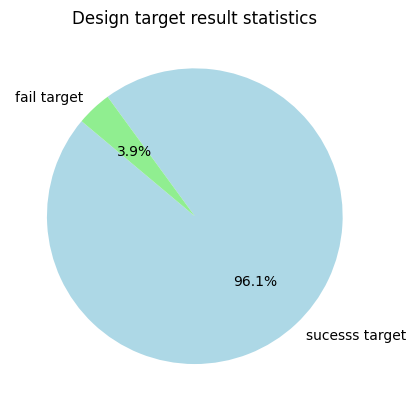

In [9]:
edit_result_path = "./data/opt_before/one_plasmid_design_result.xlsx"
one_plasmid_design_F_Result_path = "./data/opt_before/one_plasmid_design_F_Result.xlsx"

fasta_file = f"./data/opt_before/primer_bowtie/sequence.fasta"
tmp_path = f"./data/opt_before/primer_bowtie/xxx/"
genome_path = f"./data/opt_before/xxx.fna"

alin_path = fasta_file, tmp_path, genome_path

one_plasmid_design_F_Result = pd.read_excel(one_plasmid_design_F_Result_path, sheet_name='Test_primer_G')
Test_primer_G = pd.read_excel(edit_result_path,sheet_name='Test_primer_G')
Primer_g_offTarget =  pd.read_excel(edit_result_path,sheet_name='Primer_g_offTarget')

invalid_priemr_df, one_plasmid_design_F_Result_id, success_target_num_1, fail_target_num_1 = sequencing_primer_tool.count_optimal_valid_invalid_fail_nums(one_plasmid_design_F_Result, Test_primer_G, Primer_g_offTarget )

opt_before_invalid_primer = sequencing_primer_tool.get_invalid_primer(invalid_priemr_df)

fail_primer_df = sequencing_primer_tool.extract_failture_primer(one_plasmid_design_F_Result_id)
opt_before_invalid_primer =  pd.merge( opt_before_invalid_primer, fail_primer_df, how="outer" )


opt_type = "Before"
opt_before_invalid_primer = sequencing_primer_tool.rename_invalid_primer(opt_before_invalid_primer, opt_type )
opt_before_invalid_primer = sequencing_primer_tool.extract_opt_invalid_primer(Test_primer_G, opt_before_invalid_primer, alin_path, opt_type,"B:No primer3 design results")

draw_tool.draw_pie(success_target_num_1, fail_target_num_1, x_label='sucesss target', y_label='fail target')

## 优化后数量统计

全部引物：4493------最优引物：2381-------有效引物:2091-----------无效引物：21----------设计失败引物：0
左右引物全部脱靶导致无效引物：6-------左或右引物脱靶:15----------primer3设计不出来的引物：0


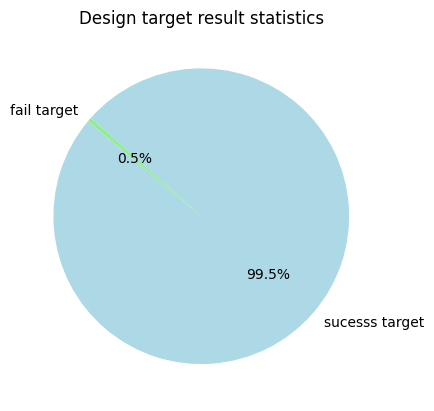

In [10]:
edit_result_path = "./data/opt_after/one_plasmid_design_result.xlsx"
one_plasmid_design_F_Result_path = "./data/opt_after/one_plasmid_design_F_Result.xlsx"

fasta_file = f"./data/opt_after/primer_bowtie/sequence.fasta"
tmp_path = f"./data/opt_after/primer_bowtie/xxx/"
genome_path = f"./data/opt_after/xxx.fna"
        
alin_path = fasta_file, tmp_path, genome_path

one_plasmid_design_F_Result = pd.read_excel(one_plasmid_design_F_Result_path, sheet_name='Test_primer_G')
Test_primer_G = pd.read_excel(edit_result_path,sheet_name='Test_primer_G')
Primer_g_offTarget =  pd.read_excel(edit_result_path,sheet_name='Primer_g_offTarget')

invalid_priemr_df, one_plasmid_design_F_Result_id, success_target_num_2, fail_target_num_2 = sequencing_primer_tool.count_optimal_valid_invalid_fail_nums(one_plasmid_design_F_Result, Test_primer_G, Primer_g_offTarget )

opt_after_invalid_primer = sequencing_primer_tool.get_invalid_primer(invalid_priemr_df)

opt_type = "After"
opt_after_invalid_primer = sequencing_primer_tool.rename_invalid_primer(opt_after_invalid_primer, opt_type )
opt_after_invalid_primer = sequencing_primer_tool.extract_opt_invalid_primer(Test_primer_G, opt_after_invalid_primer, alin_path, opt_type, opt_type_value = "A:All primer templates offtarget")

draw_tool.draw_pie(success_target_num_2, fail_target_num_2, x_label='sucesss target', y_label='fail target')

## 优化前设计失败数量VS优化前设计失败数量

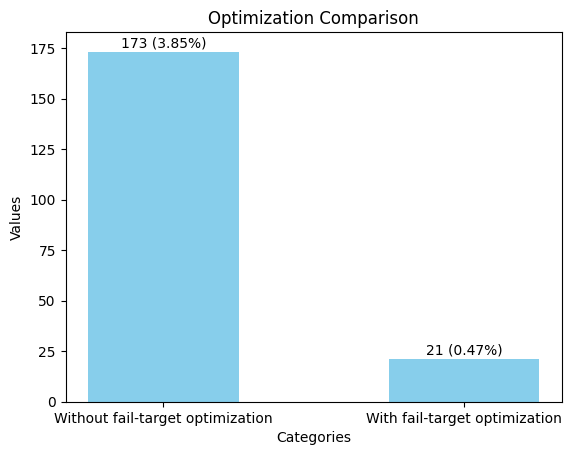

In [11]:
#
categories = ['Without fail-target optimization', 'With fail-target optimization']
fail_percent_1 = draw_tool.calculate_percentages( [fail_target_num_1, success_target_num_1] )
fail_percent_2 = draw_tool.calculate_percentages( [fail_target_num_2, success_target_num_2] )

values = [fail_target_num_1, fail_target_num_2]
percent = [fail_percent_1[0], fail_percent_2[0]]
draw_tool.draw_bar( values, percent, categories)

## 合并优化前与优化后的结果

In [12]:
if len( opt_after_invalid_primer ) < len( opt_before_invalid_primer ):
      B_offtarget_A_no_offtarget_df = sequencing_primer_tool.extract_B_offtarget_A_no_offtarget( opt_before_invalid_primer, opt_after_invalid_primer, Primer_g_offTarget,Test_primer_G, alin_path)
      opt_after_invalid_primer = opt_after_invalid_primer.append( B_offtarget_A_no_offtarget_df )

opt_after_invalid_primer = opt_after_invalid_primer.reset_index(drop=True)
df = sequencing_primer_tool.merge_opt_primer(opt_before_invalid_primer, opt_after_invalid_primer)
df["locus_tag"] = df["locus_tag"].str.replace("_del", "")
df["A:After optimization off-target"] = df["type (B: Before optimization);(A:After optimization)"].apply(lambda x: "YES" if "A:No offtarget" not in x else "NO")
b = pd.merge(all_df,df)

In [13]:
b.head()  

,locus_tag,feature,class,start,end,strand,product_accession,non-redundant_refseq,name,symbol,...,Before optimization SEQUENCING_PRIMER_1 location (start-end),Before optimization SEQUENCING_PRIMER_1 off-target site,Before optimization SEQUENCING_PRIMER_2 location (start-end),Before optimization SEQUENCING_PRIMER_2 off-target site,After optimization SEQUENCING_PRIMER_1 location (start-end),After optimization SEQUENCING_PRIMER_1 off-target site,After optimization SEQUENCING_PRIMER_2 location (start-end),After optimization SEQUENCING_PRIMER_2 off-target site,type (B: Before optimization);(A:After optimization),A:After optimization off-target
0,b0003,CDS,with_protein,2801,3733,+,NP_414544.1,WP_000241662.1,homoserine kinase,thrB,...,,,,,U00096.3:2538-2558,,U00096.3:3986-4006,,B:No primer3 design results;A:No offtarget,NO
1,b4412,CDS,with_protein,16751,16903,-,YP_025292.1,WP_000809168.1,protein HokC,hokC,...,,,,,U00096.3:16475-16497,,U00096.3:17163-17183,,B:No primer3 design results;A:No offtarget,NO
2,b0068,CDS,with_protein,74497,75480,-,NP_414610.1,WP_001301364.1,thiamine ABC transporter periplasmic binding p...,thiB,...,U00096.3:74232-74250,U00096.3:2012490-2012508;U00096.3:2438083-2438...,U00096.3:75723-75743,U00096.3:162847-162867;U00096.3:2834056-283407...,U00096.3:74225-74245,,U00096.3:75734-75754,,B:SEQUENCING_PRIMER_1 offtarget&SEQUENCING_PRI...,NO
3,b0102,CDS,with_protein,111856,112599,-,NP_414644.1,WP_001194734.1,cell division factor ZapD,zapD,...,U00096.3:111610-111630,U00096.3:3297016-3297036;U00096.3:411095-41111...,U00096.3:112830-112850,,U00096.3:111570-111590,U00096.3:111454-111474;U00096.3:2742911-2742931,U00096.3:112830-112850,,B:SEQUENCING_PRIMER_1 offtarget;A:SEQUENCING_P...,YES
4,b0106,CDS,with_protein,114522,115724,-,NP_414648.1,WP_000157266.1,inner membrane protein HofC,hofC,...,,,,,U00096.3:114252-114272,,U00096.3:115974-115995,,B:No primer3 design results;A:No offtarget,NO


## 输出最终的统计结果

In [63]:
b.to_excel("Supplementary file-1.xlsx",index=False)

xlsx_F_file = "Supplementary file-1.xlsx"
with pd.ExcelWriter(xlsx_F_file) as writer: 
    a.to_excel(writer,sheet_name = 'Hr',index=False)
    b.to_excel(writer,sheet_name = 'Sequencing primer',index=False)